In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:\\Users\\avkva\\Downloads\\archive\\netflix_titles.csv'
df = pd.read_csv(file_path)

In [3]:
print("Initial Dataframe:")
df.head()

Initial Dataframe:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')

In [7]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
len(df)

8807

In [10]:
df = df.dropna()

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5332,5332,5332,5332,5332,5332,5332,5332.000000,5332,5332,5332,5332
unique,5332,2,5332,3945,5200,604,NaN,NaN,14,198,335,5321
top,s8,Movie,Sankofa,"Raúl Campos, Jan Suter",Samuel West,United States,NaN,NaN,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,5185,1,18,10,1846,NaN,NaN,1822,135,336,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-28 19:27:46.316579072,2012.742123,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2011.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-17 00:00:00,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-26 06:00:00,2018.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,2021.000000,NaN,NaN,NaN,NaN


In [13]:
import re

def extract_numbers(text):
    if isinstance(text, str):
        numbers = re.findall(r'\d+', text)
    return int(numbers[0])


df['duration_min'] = df['duration'].apply(extract_numbers)

In [14]:
df['Month'] = df['date_added'].dt.to_period('M')
monthly_watch_time = df.groupby('Month')['duration_min'].sum()

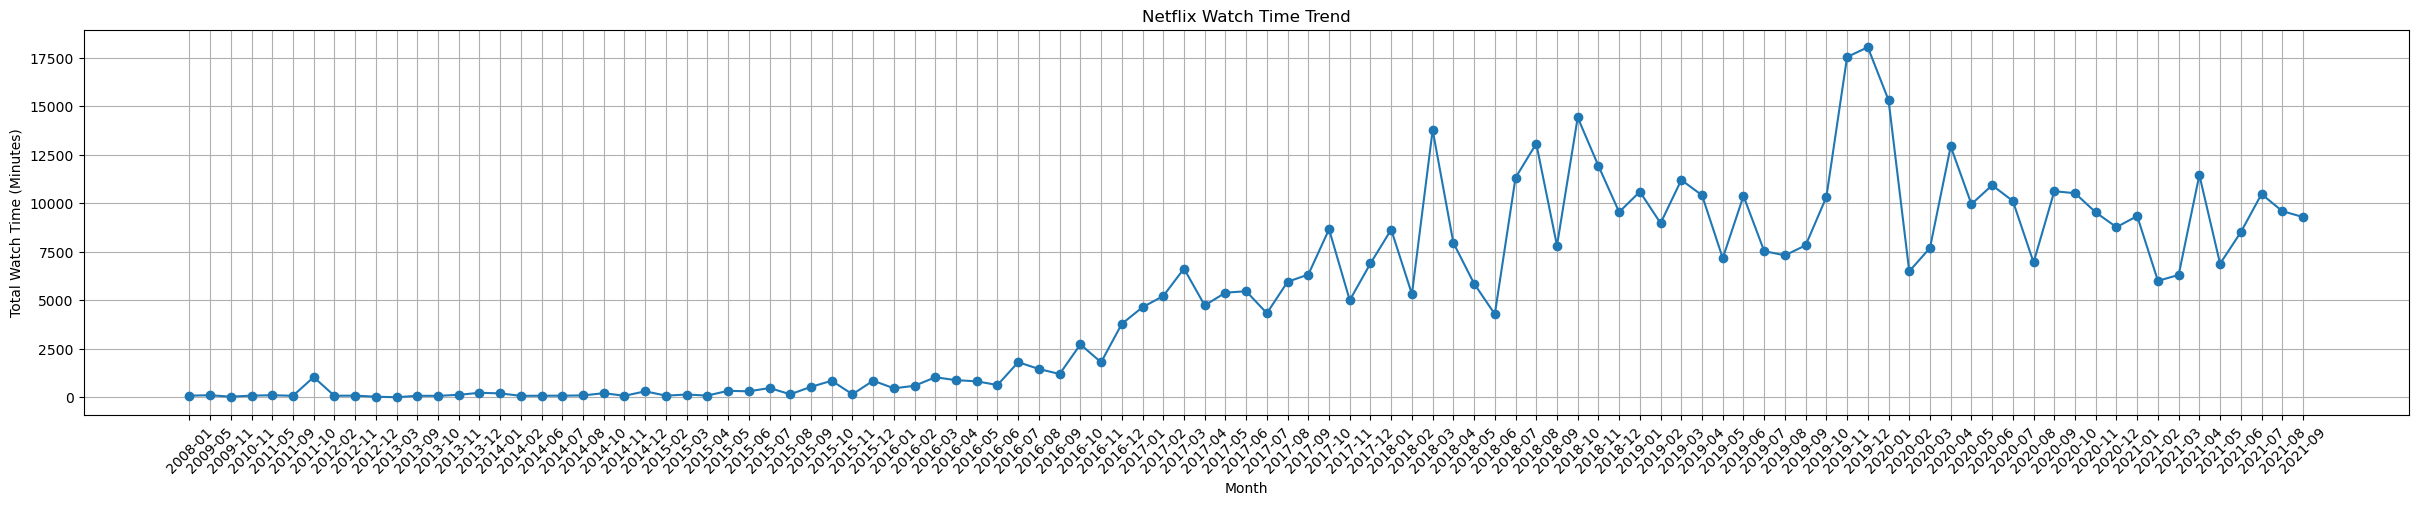

In [19]:
plt.figure(figsize=(30, 5))
plt.plot(monthly_watch_time.index.astype(str), monthly_watch_time.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Watch Time (Minutes)')
plt.title('Netflix Watch Time Trend')
plt.grid()
plt.show()